<a href="https://colab.research.google.com/github/SpaceSapiens/Code-Explorer/blob/IITM_Course/MLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
#For proper rendering of latex in colab
from IPython.display import display,Math,Latex 

import numpy as np

#Import to generate plots
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Model or Inference:- Label = Feature vector * weight vector
(y=Xw)

# C1: Training Data set

In [ ]:
#create training data set of 100 examples with single feature and label
#for this data set use the following 3 parameters

w1=3
w0=4
n=100

#Create random value for feature
X=10*np.random.rand(n,)

#y=4+3*X+random noise
y=w0+w1*X+np.random.randn(n)

print(X,y)

[7.30140176 4.73203396 6.98535135 0.42425468 7.54027061 9.56872757
 6.34136951 2.16924671 1.2252407  3.24605105 3.59053224 5.45278842
 8.63174711 4.25030338 9.71295557 4.32525407 9.07211317 8.30636532
 5.93098292 4.42892802 8.67373993 8.36877956 8.51432082 8.76623822
 1.15756112 2.38424005 4.66150283 9.67858131 8.81686779 1.11570869
 6.67791356 9.58552329 7.53646259 2.55183409 2.2972439  9.36611834
 2.33135686 7.79608823 5.1232285  1.02855839 3.71196682 5.917545
 9.34422105 4.4805704  0.61677265 0.87547986 9.18290423 4.48131745
 3.39360024 0.19866066 9.37394805 5.58140209 4.82710837 9.9858463
 0.81976878 3.72486021 8.93736271 7.62070056 5.58848713 9.23982048
 8.30196259 4.10747791 1.00271997 2.55787146 1.82383661 5.45879356
 1.48279018 0.97134202 2.26579127 2.33820715 2.84775639 4.77723281
 4.7243449  8.15455795 1.76959117 6.85658975 0.09419843 4.49774509
 0.46223028 6.65941203 5.82606935 1.36650992 3.26868177 2.47767071
 7.28761596 8.87389835 1.65954132 4.36542335 7.77801685 0.4780056

In [ ]:
print("Shape of data set, feature matrix",X.shape)
print("Shape of data set, label",y.shape)

Shape of data set, feature matrix (100,)
Shape of data set, label (100,)


Divide the generated data set into training and test data sets (80% train, 20% test)

In [ ]:
from sklearn.model_selection import train_test_split as ttt

X_train,X_test,y_train,y_test=ttt(X,y,test_size=0.2,random_state=42)

In [ ]:
#Check the shape of the train and test data sets formed
print("Shape of training set, feature matrix",X_train.shape)
print("Shape of training set, label",y_train.shape)

print("Shape of test set, feature matrix",X_test.shape)
print("Shape of test set, label",y_test.shape)

Shape of training set, feature matrix (80,)
Shape of training set, label (80,)
Shape of test set, feature matrix (20,)
Shape of test set, label (20,)


In [ ]:
#Check few examples and labesls
X_train[:5]

array([3.72486021, 7.77801685, 4.66150283, 9.34422105, 2.33820715])

In [ ]:
y_train[:5]

array([15.69623373, 26.94082458, 19.37975749, 32.4534878 , 11.92644427])

Visualize the data set

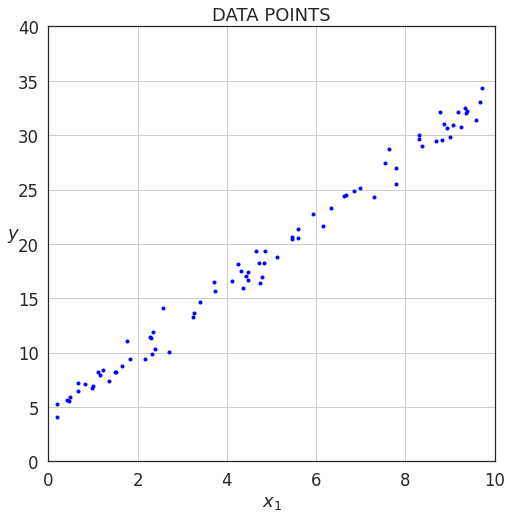

In [ ]:
sns.set_style("white")
f=plt.figure(figsize=(8,8))
sns.set_context("notebook",font_scale=1.5,rc={"lines.linewidth":2.5})

plt.plot(X_train,y_train,"b.")
plt.title("DATA POINTS")
plt.grid(True)
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,10,0,40])

plt.show()

We have to find a regression model with one feature to accomodate the data as shown above: y=w0+w1x1

Add dummy feature x0 and set it to 1

In [ ]:
#Create a function to add this dummy feature
def add_dummy_feature(x):
    return np.column_stack((np.ones(x.shape[0]),x))

In [ ]:
#Test the created function using a unittest
import unittest
class TestAddDummyFeature(unittest.TestCase):
    def test_Add_dummy_feature(self):
        #Create a dummy test case
        train_testmatrix=np.array([[3,2,5],[9,4,7]])
        train_testmatrix_with_dummy_feature=add_dummy_feature(train_testmatrix)
        print(train_testmatrix_with_dummy_feature)

        #Test the shape
        self.assertEqual(train_testmatrix_with_dummy_feature.shape,(2,4))
        #test content
        np.testing.assert_array_equal(train_testmatrix_with_dummy_feature,np.array([[1,3,2,5],[1,9,4,7]]))

unittest.main(argv=[''],defaultTest="TestAddDummyFeature",verbosity=2,exit=False)

test_Add_dummy_feature (__main__.TestAddDummyFeature) ... 

[[1. 3. 2. 5.]
 [1. 9. 4. 7.]]


ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [ ]:
print("X train: Before adding dummy \n",X_train[:5])
print("\n")

X_train_with_dummy=add_dummy_feature(X_train)
print("X train: After adding dummy \n",X_train_with_dummy[:5])
print("\n")


X train: Before adding dummy 
 [3.72486021 7.77801685 4.66150283 9.34422105 2.33820715]


X train: After adding dummy 
 [[1.         3.72486021]
 [1.         7.77801685]
 [1.         4.66150283]
 [1.         9.34422105]
 [1.         2.33820715]]




# C2: Model

label vector = Feature vector * weight vector

In [ ]:
#Create a function to predict the label
#it will take the feature vector and weight vector as arguments

def predict(X,w):
    #X will have the dimension(n,m+1) where n= examples, m=no. of features
    #w will have the dimension(m+1,n)
    #y will have the dimension(n,)
    
    #ensure the matrices can be multiplied
    assert X.shape[-1]==w.shape[0]
    
    #return the vector multiple of the 2 vectors as predcited label vector
    return X@w
    

In [ ]:
#test the predict function with a reference vector
import unittest
class TestPredict(unittest.TestCase):
    def test_predict(self):
        #create a reference X, w and y
        train_matrix=np.array([[1,3,2,5],[1,9,4,7]])
        weight_vector=np.array([1,1,1,1])
        expected_label_vector=np.array([11,21])
        
        #Call the predict function
        predicted_label_vector=predict(train_matrix,weight_vector)
        
        #Test the shape of the predicted label vector
        self.assertEqual(predicted_label_vector.shape,(2,))
        
        #Test the content
        np.testing.assert_array_equal(predicted_label_vector,expected_label_vector)
unittest.main(argv=[''],defaultTest="TestPredict",verbosity=2,exit=False)

test_predict (__main__.TestPredict) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


Implement this predict function onto the generated dataset with dummy feature

In [ ]:
#Genrate a random weight vector for tetsing
w=np.random.rand(2,)
w

array([0.43178879, 0.016046  ])

In [ ]:
#make the prediction using this weight vector
y_hat=predict(X_train_with_dummy,w)

In [ ]:
#Check the predicted value
y_hat[:10]

array([0.4915579 , 0.55659487, 0.50658728, 0.58172619, 0.46930767,
       0.50119183, 0.49135102, 0.45602884, 0.48387493, 0.50759564])

In [ ]:
#Compare with the actual value
y_train[:10]

array([15.69623373, 26.94082458, 19.37975749, 32.4534878 , 11.92644427,
       17.54641612, 16.48180478,  8.25358708, 13.24966181, 18.23010744])

Large error is due to the random weight vector we have generated

# C3: Loss Function implementation

Loss: J=0.5*(Xw-y)T*(Xw-y)

In [ ]:
#Define a loss function, which accepts X, y and w
def loss(X,y,w):
    #Calculate error as predict - actual
    e=predict(X,w)-y
    return (1/2)*(np.transpose(e)@e)

In [ ]:
#Check the loss as per the standard exaple matrix

import unittest
class TestLoss(unittest.TestCase):
    def test_loss(self):
        #create standard testing matices
        test_lossX=np.array([[1,3,2,5],[1,9,4,7]])
        test_lossy=np.array([6,11])
        test_lossw=np.array([1,1,1,1])
        expected_loss=np.array([62.5])
        loss_value=loss(test_lossX,test_lossy,test_lossw)
        
        #test shape
        self.assertEqual(loss_value.shape,())
        
        #test Content
        np.testing.assert_array_equal(expected_loss,loss_value)
unittest.main(argv=[''],defaultTest="TestLoss",verbosity=2,exit=False)

test_loss (__main__.TestLoss) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [ ]:
#Now create a random weight vector to train the model
w=np.random.rand(2,)
w

array([0.43432977, 0.17766464])

# C4:Optimization

Optimization using **Normal Equation**

In [ ]:
# Weightvector is estimated by matrix multiplication of pseudo inverse of feature matrix and label matrix
#Implement a function to implement this
def normal_equation(X,y):
    return np.linalg.pinv(X)@y

In [ ]:
X_test_with_dummy=add_dummy_feature(X_test)
X_test_with_dummy

array([[1.        , 2.47767071],
       [1.        , 9.9858463 ],
       [1.        , 2.84775639],
       [1.        , 0.87547986],
       [1.        , 0.61677265],
       [1.        , 1.02855839],
       [1.        , 8.51432082],
       [1.        , 5.82606935],
       [1.        , 3.59053224],
       [1.        , 7.30140176],
       [1.        , 5.93098292],
       [1.        , 6.67791356],
       [1.        , 8.15455795],
       [1.        , 2.55183409],
       [1.        , 3.37971036],
       [1.        , 7.54027061],
       [1.        , 0.09419843],
       [1.        , 4.49774509],
       [1.        , 8.63174711],
       [1.        , 9.58552329]])

In [ ]:
#Test the function with the data set created
import unittest
class TestNormalEquation(unittest.TestCase):
  def test_normal_equation(self):
    #setup
    feature_matrix=X_train_with_dummy
    label_matrix=y_train
    expected_weight_vector=np.array([4.,3.])

    #Call the normal function
    estimated_weight_vector=normal_equation(feature_matrix,label_matrix)
    print(estimated_weight_vector)
    #Assert
    #Shape
    self.assertEqual(estimated_weight_vector.shape,(2,))

    #Content
    np.testing.assert_array_almost_equal(estimated_weight_vector,expected_weight_vector,decimal=0)
unittest.main(argv=[""],defaultTest="TestNormalEquation",verbosity=2,exit=False)


test_normal_equation (__main__.TestNormalEquation) ... 

[4.22685488 2.9722927 ]


ok

----------------------------------------------------------------------
Ran 1 test in 0.018s

OK


Optimization using **Gradient Descent**

Initial weight = 0, and we improve the weight iteratively based on the derivative of loss function

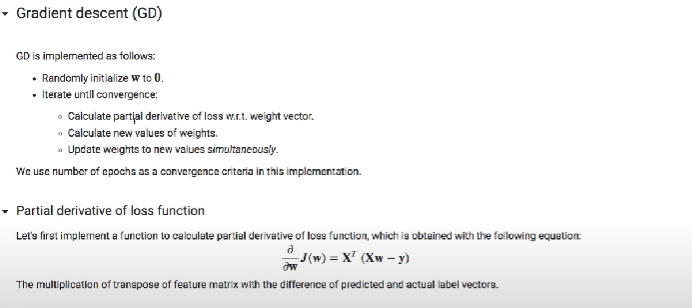

In [ ]:
#Function to calculate the gradient
def calculate_gradient(X,y,w):
  return np.transpose(X)@(predict(X,w)-y)

In [ ]:
#Test the function suing predefined matrix
class TestCalculateGradient(unittest.TestCase):
  def test_calculate_gradient(self):
    #Initialize
    feature_matrix=np.array([[1,3,2,5],[1,9,4,7]])
    weight_vector=np.array([1,1,1,1])
    label_vector=np.array([6,11])
    expected_gradient=np.array([15,105,50,95])

    #Call
    grad=calculate_gradient(feature_matrix,label_vector,weight_vector)

    #Assert
    #Shape
    self.assertEqual(grad.shape,(4,))

    #Content
    np.testing.assert_array_almost_equal(grad,expected_gradient,decimal=0)

unittest.main(argv=[''],defaultTest="TestCalculateGradient",verbosity=2,exit=False)


test_calculate_gradient (__main__.TestCalculateGradient) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


**Weight Update**

Updated weight=old weight - (learning rate*grad)

In [ ]:
#update weight function
#lr=learning rate
def update_weight(w,grad,lr):
  return (w-lr*grad)

In [ ]:
#Test the function using standard matrix
class TestUpdateWeight(unittest.TestCase):
  def test_update_weight(self):
    #Initialize
    weight_vector=np.array([1,1,1,1])
    grad_vector=np.array([15,105,50,95])
    learning_rate=0.001
    expected_w_new=np.array([0.985,0.895,0.95,0.905])

    #Call
    w_new=update_weight(weight_vector,grad_vector,learning_rate)

    #Assert
    #Shape
    self.assertEqual(w_new.shape,(4,))

    #Content
    np.testing.assert_array_almost_equal(w_new,expected_w_new,decimal=1)


unittest.main(argv=[''],defaultTest="TestUpdateWeight",verbosity=2,exit=False)

test_update_weight (__main__.TestUpdateWeight) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.008s

OK


# **Gradient Descent**

In [ ]:
def gradient_descent(X:np.ndarray,y:np.ndarray,lr:float,num_epoch:int):
  w_all=[] #All weights across iterations
  err_all=[] #All errors across iterations

  #Initialize starting weight as [0,0]
  w=np.zeros((X.shape[1]))

  for i in range(num_epoch):
    w_all.append(w)
    #Calculate loss
    err_all.append(loss(X,y,w))
    #Gradient
    dJdw=calculate_gradient(X,y,w)
    #Print stats at every 100th iteration
    if(i%100==0):
      print("Iteration: %d ,  Loss: %4.2f"%(i,err_all[-1]))
    #Update Weight
    w=update_weight(w,dJdw,lr)
  return w,err_all,w_all


In [ ]:
class TestGradientDescent(unittest.TestCase):
  def test_gradient_descent(self):
    #Initialize
    feature_matrix=X_train_with_dummy
    label_vector=y_train
    expected_weights=np.array([4.,3.])

    #call
    w,err_all,w_all=gradient_descent(feature_matrix,label_vector,0.0001,2000)

    #Assert
    #Shape
    self.assertEqual(w.shape,(2,))

    #COntent
    np.testing.assert_array_almost_equal(w,expected_weights,decimal=0)
unittest.main(argv=[''],defaultTest="TestGradientDescent",verbosity=2,exit=False)

test_gradient_descent (__main__.TestGradientDescent) ... 

Iteration: 0 ,  Loss: 17123.81
Iteration: 100 ,  Loss: 130.28
Iteration: 200 ,  Loss: 95.46
Iteration: 300 ,  Loss: 72.95
Iteration: 400 ,  Loss: 58.41
Iteration: 500 ,  Loss: 49.00
Iteration: 600 ,  Loss: 42.93
Iteration: 700 ,  Loss: 39.00
Iteration: 800 ,  Loss: 36.46
Iteration: 900 ,  Loss: 34.82
Iteration: 1000 ,  Loss: 33.76
Iteration: 1100 ,  Loss: 33.07
Iteration: 1200 ,  Loss: 32.63
Iteration: 1300 ,  Loss: 32.34
Iteration: 1400 ,  Loss: 32.16
Iteration: 1500 ,  Loss: 32.04
Iteration: 1600 ,  Loss: 31.96
Iteration: 1700 ,  Loss: 31.91
Iteration: 1800 ,  Loss: 31.88
Iteration: 1900 ,  Loss: 31.85


ok

----------------------------------------------------------------------
Ran 1 test in 0.032s

OK


In [ ]:
#Plot learning curve to understand the optimization
def plot_learning_curve(err_all):
  plt.plot(err_all)
  plt.xlabel("Iteration #")
  plt.ylabel("Loss: $J(\mathbf{w})$")

Iteration: 0 ,  Loss: 17123.81
Iteration: 100 ,  Loss: 130.28
Iteration: 200 ,  Loss: 95.46
Iteration: 300 ,  Loss: 72.95
Iteration: 400 ,  Loss: 58.41
Iteration: 500 ,  Loss: 49.00
Iteration: 600 ,  Loss: 42.93
Iteration: 700 ,  Loss: 39.00
Iteration: 800 ,  Loss: 36.46
Iteration: 900 ,  Loss: 34.82
Iteration: 1000 ,  Loss: 33.76
Iteration: 1100 ,  Loss: 33.07
Iteration: 1200 ,  Loss: 32.63
Iteration: 1300 ,  Loss: 32.34
Iteration: 1400 ,  Loss: 32.16
Iteration: 1500 ,  Loss: 32.04
Iteration: 1600 ,  Loss: 31.96
Iteration: 1700 ,  Loss: 31.91
Iteration: 1800 ,  Loss: 31.88
Iteration: 1900 ,  Loss: 31.85


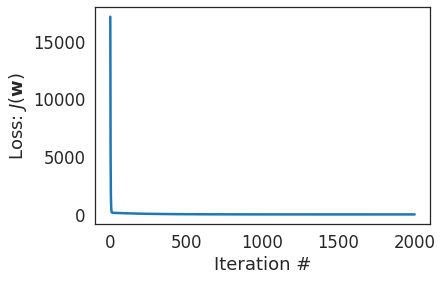

In [ ]:
w,err_all,w_all=gradient_descent(X_train_with_dummy,y_train,0.0001,2000)
plot_learning_curve(err_all)

# **Learning Rate**
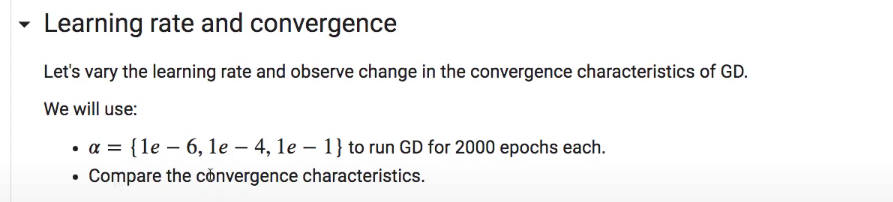

Iteration: 0 ,  Loss: 17123.81
Iteration: 100 ,  Loss: 10121.34
Iteration: 200 ,  Loss: 6012.98
Iteration: 300 ,  Loss: 3602.50
Iteration: 400 ,  Loss: 2188.09
Iteration: 500 ,  Loss: 1358.04
Iteration: 600 ,  Loss: 870.82
Iteration: 700 ,  Loss: 584.72
Iteration: 800 ,  Loss: 416.61
Iteration: 900 ,  Loss: 317.73
Iteration: 1000 ,  Loss: 259.46
Iteration: 1100 ,  Loss: 225.01
Iteration: 1200 ,  Loss: 204.54
Iteration: 1300 ,  Loss: 192.27
Iteration: 1400 ,  Loss: 184.82
Iteration: 1500 ,  Loss: 180.19
Iteration: 1600 ,  Loss: 177.22
Iteration: 1700 ,  Loss: 175.22
Iteration: 1800 ,  Loss: 173.80
Iteration: 1900 ,  Loss: 172.71


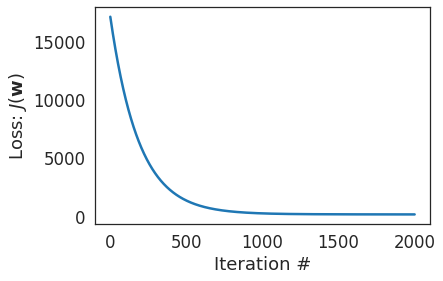

In [ ]:
#For very small learning rate
w,err_all,w_all=gradient_descent(X_train_with_dummy,y_train,1e-6,2000)
plot_learning_curve(err_all)

Iteration: 0 ,  Loss: 17123.81
Iteration: 100 ,  Loss: 130.28
Iteration: 200 ,  Loss: 95.46
Iteration: 300 ,  Loss: 72.95
Iteration: 400 ,  Loss: 58.41
Iteration: 500 ,  Loss: 49.00
Iteration: 600 ,  Loss: 42.93
Iteration: 700 ,  Loss: 39.00
Iteration: 800 ,  Loss: 36.46
Iteration: 900 ,  Loss: 34.82
Iteration: 1000 ,  Loss: 33.76
Iteration: 1100 ,  Loss: 33.07
Iteration: 1200 ,  Loss: 32.63
Iteration: 1300 ,  Loss: 32.34
Iteration: 1400 ,  Loss: 32.16
Iteration: 1500 ,  Loss: 32.04
Iteration: 1600 ,  Loss: 31.96
Iteration: 1700 ,  Loss: 31.91
Iteration: 1800 ,  Loss: 31.88
Iteration: 1900 ,  Loss: 31.85


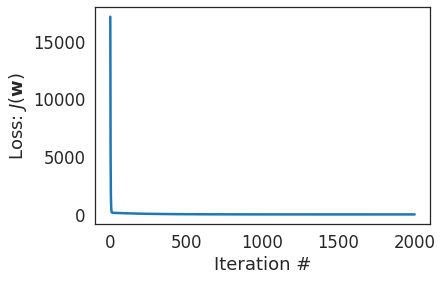

In [ ]:
#Increase Lr to 1e-4
w,err_all,w_all=gradient_descent(X_train_with_dummy,y_train,1e-4,2000)
plot_learning_curve(err_all)

Iteration: 0 ,  Loss: 17123.81
Iteration: 100 ,  Loss:  inf
Iteration: 200 ,  Loss:  nan
Iteration: 300 ,  Loss:  nan
Iteration: 400 ,  Loss:  nan
Iteration: 500 ,  Loss:  nan
Iteration: 600 ,  Loss:  nan
Iteration: 700 ,  Loss:  nan
Iteration: 800 ,  Loss:  nan
Iteration: 900 ,  Loss:  nan
Iteration: 1000 ,  Loss:  nan
Iteration: 1100 ,  Loss:  nan
Iteration: 1200 ,  Loss:  nan
Iteration: 1300 ,  Loss:  nan
Iteration: 1400 ,  Loss:  nan
Iteration: 1500 ,  Loss:  nan
Iteration: 1600 ,  Loss:  nan
Iteration: 1700 ,  Loss:  nan
Iteration: 1800 ,  Loss:  nan
Iteration: 1900 ,  Loss:  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in matmul
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in matmul
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.


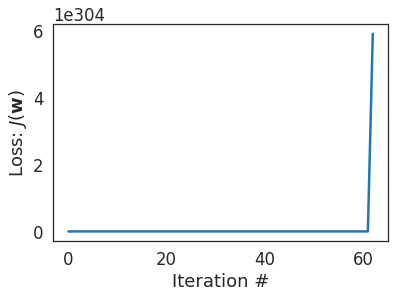

In [ ]:
#Lr=0.1
w,err_all,w_all=gradient_descent(X_train_with_dummy,y_train,0.1,2000)
plot_learning_curve(err_all)

# **Mini Batch Gradient Descend**
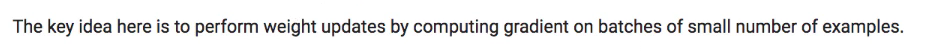

In [ ]:
#Learning rate decreases as we iterate through the data
t0,t1=200,10000
def learning_schedule(t):
  return t0/(t+t1)

In [ ]:
#Mini Batch function
#Same as that of Gradient descen, differes only while selecting a few data elements for weight calculation

def min_batch_gd(X:np.ndarray,y:np.ndarray,num_iter:int,minibatch_size:int):
  w_all=[] #All weights across iterations
  err_all=[] #All errors across iterations

  #Initialize starting weight as [0,0]
  w=np.zeros((X.shape[1]))
  t=0

  for i in range(num_iter):
    #Selection of small number of examples
    #Shuffle indices to select random elements (MBGD)
    shuffled_indices=np.random.permutation(X.shape[0])
    X_shuffled=X[shuffled_indices]
    y_shuffled=y[shuffled_indices]
    for i in range(0,X.shape[0],minibatch_size):
      t+=1
      Xi=X_shuffled[i:i+minibatch_size]
      yi=y_shuffled[i:i+minibatch_size]
      #calculate error
      err_all.append(loss(Xi,yi,w))
      #Gradient Calculation
      gradient=2/minibatch_size*calculate_gradient(Xi,yi,w)
      lr=learning_schedule(t)
      w=update_weight(w,gradient,lr)
      w_all.append(w)
      
  return w,err_all,w_all

In [ ]:
#Test MBGD

class TestMiniBatchGD(unittest.TestCase):
  def test_mini_batch_gd(self):
    #set up
    feature_matrix=X_train_with_dummy
    label_vector=y_train
    expected_weight=np.array([4.,3.])

    #Call
    w,err_all,w_all=min_batch_gd(feature_matrix,label_vector,200,8)

    #Assert
    self.assertEqual(w.shape,(2,))
    #Content
    np.testing.assert_array_almost_equal(w,expected_weight,decimal=0)
unittest.main(argv=[""],defaultTest="TestMiniBatchGD",verbosity=2,exit=False)

test_mini_batch_gd (__main__.TestMiniBatchGD) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.042s

OK


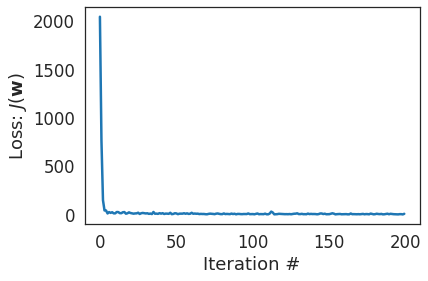

In [ ]:
#Check Learning curve for MBGD
w,err_all,w_all=min_batch_gd(X_train_with_dummy,y_train,20,8)
plot_learning_curve(err_all)


## **Stochastic Gradient Descent**

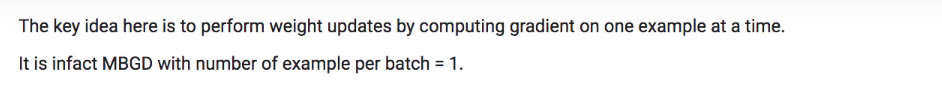

In [ ]:
def sgd(X:np.ndarray,y:np.ndarray,num_epochs:int):
  w_all=[] #All parameters across epochs
  err_all=[] #Respective errors

  #Parameter vector initialized to 0
  w=np.zeros((X.shape[1]))
  for epoch in range(num_epochs):
    for i in range(X.shape[0]):
      random_index=np.random.randint(X.shape[0])
      xi=X[random_index:random_index+1]
      yi=y[random_index:random_index+1]
      err_all.append(loss(xi,yi,w))
      gradients=2*calculate_gradient(xi,yi,w)
      lr=learning_schedule(epoch*X.shape[0]+i)

      w=update_weight(w,gradients,lr)
      w_all.append(w)

  return w,err_all,w_all

In [ ]:
#Test SGD

class TestStochiasticGD(unittest.TestCase):
  def test_sgd(self):
    #set up
    feature_matrix=X_train_with_dummy
    label_vector=y_train
    expected_weight=np.array([4.,3.])

    #Call
    w,err_all,w_all=sgd(feature_matrix,label_vector,20)

    #Assert
    self.assertEqual(w.shape,(2,))
    #Content
    np.testing.assert_array_almost_equal(w,expected_weight,decimal=0)
unittest.main(argv=[""],defaultTest="TestStochiasticGD",verbosity=2,exit=False)

test_sgd (__main__.TestStochiasticGD) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.039s

OK


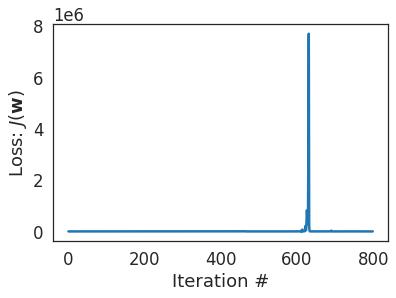

In [ ]:
#Check Learning curve for SGD
w,err_all,w_all=sgd(X_train_with_dummy,y_train,10)
plot_learning_curve(err_all)



---
⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡
# **WEEK3**








# **Polynomial Regression**

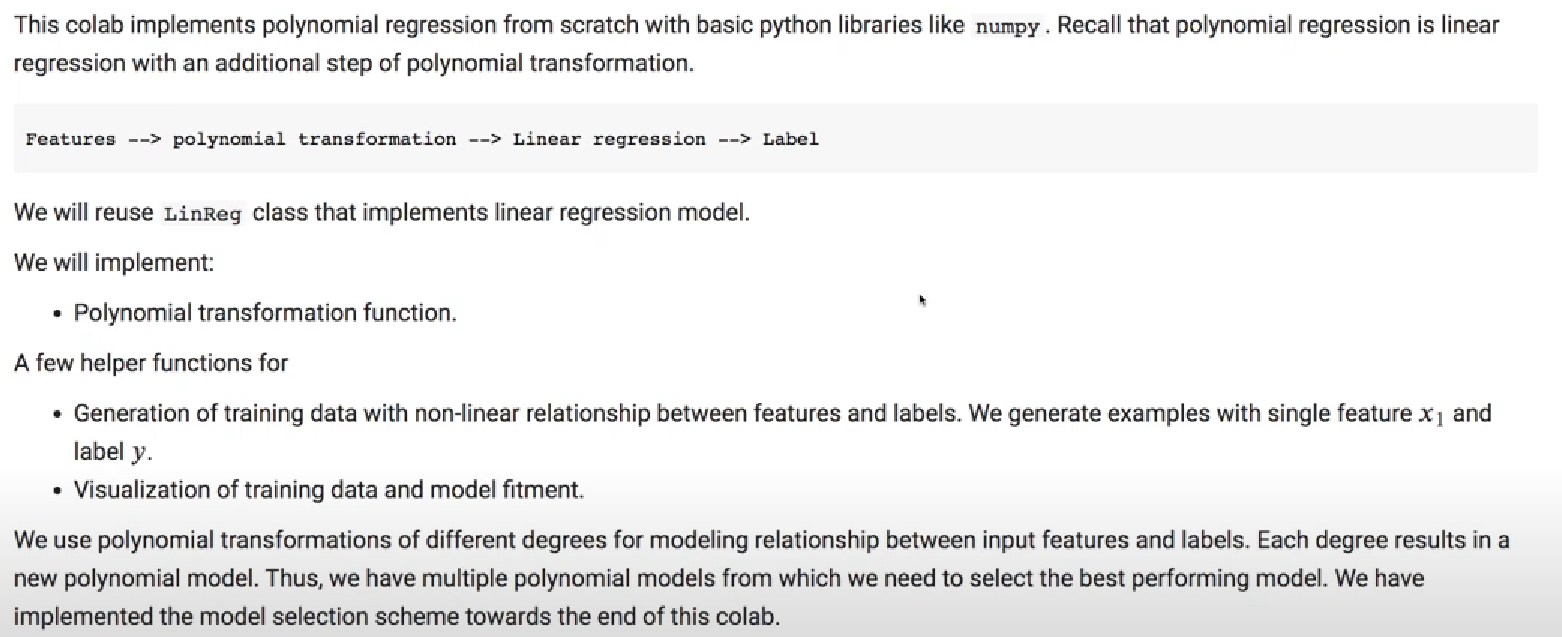

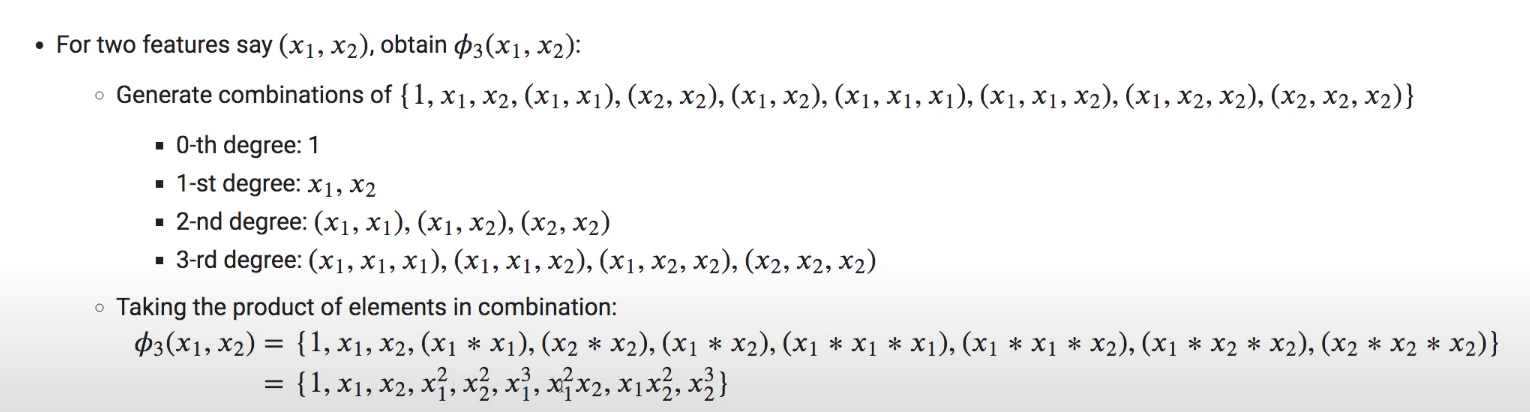

In [ ]:
#Write a function to get the combination of polynomial elements
import itertools
import functools
def get_combinations(X,degree):
  return itertools.combinations_with_replacement(X,degree)

In [ ]:
#Write function to compute new features
#if item = [1,2,3,4,5] function returns (((1*2)*3)*4)*5
def compute_new_feature(items):
  return functools.reduce(lambda x,y:x*y,items)

In [ ]:
#Check the generated functions
#Feature =1 degree=3
{items:compute_new_feature(items)for items in get_combinations([1],3)}

{(1, 1, 1): 1}

In [ ]:
#Feature =2 degree=3
{items:compute_new_feature(items)for items in get_combinations([2,3],3)}

{(2, 2, 2): 8, (2, 2, 3): 12, (2, 3, 3): 18, (3, 3, 3): 27}

In [ ]:
#Feature =2 degree=4
{items:compute_new_feature(items)for items in get_combinations([2,3],4)}

{(2, 2, 2, 2): 16,
 (2, 2, 2, 3): 24,
 (2, 2, 3, 3): 36,
 (2, 3, 3, 3): 54,
 (3, 3, 3, 3): 81}

Polynomial Transform Function

In [ ]:
import numpy as np
import itertools
import functools
#Create the function
def polynomial_transform(x,degree,logging=False):
  #Convert to feature matrix
  if(x.ndim==1):
    x=x[:,None]
  #Transpose the feature matrix
  x_t=x.transpose() 
  #Populate all 1s as first feature
  features=[np.ones(len(x))]

  if logging:
    print("Input: ",x)
  #Generate combination for all degrees
  for current_degree in range(1,degree+1):
    #Combine features into a new feature
    for items in get_combinations(x_t,current_degree):
      features.append(compute_new_feature(items))
      if logging:
        print(items," : ",compute_new_feature(items))
  if logging:
    print(np.asarray(features).transpose())
  #Return the new feature array
  return np.asarray(features).transpose()


In [ ]:
#Test the polynomial transformation
#Feature=1, degree=3
polynomial_transform(np.array([2]),3,True)

Input:  [[2]]
(array([2]),)  :  [2]
(array([2]), array([2]))  :  [4]
(array([2]), array([2]), array([2]))  :  [8]
[[1. 2. 4. 8.]]


array([[1., 2., 4., 8.]])

In [ ]:
#Feature=2, degree=2
#2 examples of single feature each, at 2 degree
polynomial_transform(np.array([2,3]),2,True)

Input:  [[2]
 [3]]
(array([2, 3]),)  :  [2 3]
(array([2, 3]), array([2, 3]))  :  [4 9]
[[1. 2. 4.]
 [1. 3. 9.]]


array([[1., 2., 4.],
       [1., 3., 9.]])

In [ ]:
#2 examples of 2 feature each, at 2 degree
polynomial_transform(np.array([[2,3],[4,5]]),2,True)

Input:  [[2 3]
 [4 5]]
(array([2, 4]),)  :  [2 4]
(array([3, 5]),)  :  [3 5]
(array([2, 4]), array([2, 4]))  :  [ 4 16]
(array([2, 4]), array([3, 5]))  :  [ 6 20]
(array([3, 5]), array([3, 5]))  :  [ 9 25]
[[ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


array([[ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [ ]:
#2 examples of 2 feature each, at 3 degree
#Examples = [2,3] and [4,5]
polynomial_transform(np.array([[2,3],[4,5]]),3,True)

Input:  [[2 3]
 [4 5]]
(array([2, 4]),)  :  [2 4]
(array([3, 5]),)  :  [3 5]
(array([2, 4]), array([2, 4]))  :  [ 4 16]
(array([2, 4]), array([3, 5]))  :  [ 6 20]
(array([3, 5]), array([3, 5]))  :  [ 9 25]
(array([2, 4]), array([2, 4]), array([2, 4]))  :  [ 8 64]
(array([2, 4]), array([2, 4]), array([3, 5]))  :  [12 80]
(array([2, 4]), array([3, 5]), array([3, 5]))  :  [ 18 100]
(array([3, 5]), array([3, 5]), array([3, 5]))  :  [ 27 125]
[[  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   5.  16.  20.  25.  64.  80. 100. 125.]]


array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [ ]:
polynomial_transform(np.array([2]),0,True)

Input:  [[2]]
[[1.]]


array([[1.]])